In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('stylesheet')

In [55]:
df = pd.read_pickle('./timeseries/indices.pickle')

In [56]:
UST5 = pd.read_excel('./timeseries/treasury_5y.xls',header=None)
UST5.columns = ['Date','Treasury5y']
UST5.Date = pd.to_datetime(UST5.Date)
UST5 = UST5.set_index('Date')
UST5 = UST5.diff()

In [57]:
aex = pd.read_csv('./timeseries/AEX.csv')
aex['Date'] = pd.to_datetime(aex['Date'])
aex=  aex.set_index('Date')
aex = aex[['Close']]
aex.columns = ['AEX']
aex = np.log(aex/aex.shift(1)).dropna()

In [58]:
EUR_USD = pd.read_excel('./timeseries/EUR_USD.xls')
EUR_USD.observation_date = pd.to_datetime(EUR_USD.observation_date)
EUR_USD = EUR_USD.set_index('observation_date')
EUR_USD = np.log(EUR_USD/EUR_USD.shift(1))

In [59]:
EUR_TRY = pd.read_excel('./timeseries/EUR_TRY.xlsx')
EUR_TRY.Date = pd.to_datetime(EUR_TRY.Date)
EUR_TRY = EUR_TRY.set_index('Date')['TRY']
EUR_TRY = np.log(EUR_TRY/EUR_TRY.shift(1))
EUR_TRY = EUR_TRY.dropna()

In [60]:
bist = pd.read_csv('./timeseries/bist_all_shares.csv')
bist['Date'] = pd.to_datetime(bist['Date'])
bist=  bist.set_index('Date')
bist = bist[['Close']]
bist.columns = ['Bist']
bist = np.log(bist/bist.shift(1))
bist['Bist'].loc['2020-07-27'] = bist['Bist'].mean()

In [61]:
joined = df.join(EUR_USD).join(EUR_TRY).join(bist).join(UST5).join(aex)
joined = joined.dropna()
joined = joined.loc['2011':]

In [62]:
joined['Bist EUR'] = joined['Bist'] + joined['TRY']
joined['Commodities EUR'] = joined['Commodities'] + joined['DEXUSEU']
joined['US CMBL EUR'] = joined['US CMBL'] + joined['DEXUSEU']
joined['Nasdaq EUR'] = joined['Nasdaq'] + joined['DEXUSEU']
joined['Emerging equity EUR'] = joined['Emerging equity'] + joined['DEXUSEU']
joined['Private Debt EUR'] = joined['Private Debt'] + joined['DEXUSEU']
joined.columns

Index(['Commodities', 'Europe Equity', 'US CMBL', 'France All Maturities',
       'Private Debt', 'Nasdaq', 'Emerging equity', 'DEXUSEU', 'TRY', 'Bist',
       'Treasury5y', 'AEX', 'Bist EUR', 'Commodities EUR', 'US CMBL EUR',
       'Nasdaq EUR', 'Emerging equity EUR', 'Private Debt EUR'],
      dtype='object')

In [63]:
joined.to_pickle('All_timeseries.pickle')

In [53]:
joined

,Commodities,Europe Equity,US CMBL,France All Maturities,Private Debt,Nasdaq,Emerging equity,DEXUSEU,TRY,Bist,Treasury5y,AEX,Bist EUR,Commodities EUR,US CMBL EUR,Nasdaq EUR,Emerging equity EUR,Private Debt EUR
Date,,,,,,,,,,,,,,,,,,
2011-04-04,0.003454,0.001092,0.002315,0.001399,0.000785,-0.000147,0.000817,0.000422,0.005830,0.028024,-0.04,-0.001192,0.033853,0.028446,0.002737,0.000275,0.001239,0.001207
2011-04-05,0.002071,0.002317,-0.002599,-0.001292,0.000221,0.000717,0.003485,0.000633,-0.001886,0.001589,0.08,-0.000136,-0.000296,0.002222,-0.001967,0.001349,0.004118,0.000853
2011-04-06,-0.006043,0.002402,-0.000420,-0.001186,0.000587,0.003087,-0.002662,0.007212,0.006547,0.014078,0.04,0.001841,0.020625,0.021291,0.006792,0.010299,0.004550,0.007799
2011-04-07,0.004478,-0.002577,0.001834,0.000647,0.000090,-0.001315,0.003024,-0.003215,-0.001202,0.012181,-0.03,-0.006106,0.010979,0.008966,-0.001380,-0.004530,-0.000190,-0.003124
2011-04-08,0.002969,0.003503,0.000998,-0.003346,0.000549,-0.005638,-0.006883,0.010444,0.000000,-0.020311,0.02,-0.001226,-0.020311,-0.009867,0.011443,0.004806,0.003561,0.010994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-25,0.010956,-0.007929,0.002460,0.003644,0.000342,0.006838,0.015879,-0.003372,0.006654,-0.001492,-0.02,-0.003473,0.005162,-0.004864,-0.000912,0.003466,0.012506,-0.003030
2021-01-26,0.004657,0.005760,-0.000039,-0.001555,-0.000508,-0.000728,-0.018319,0.000741,-0.003054,-0.002666,0.00,0.000456,-0.005719,-0.001924,0.000702,0.000013,-0.017578,0.000233
2021-01-27,0.002700,-0.011079,0.001192,0.000566,-0.000860,-0.026433,-0.006336,-0.003794,0.002561,-0.046027,-0.01,-0.016258,-0.043466,-0.049821,-0.002603,-0.030227,-0.010130,-0.004654


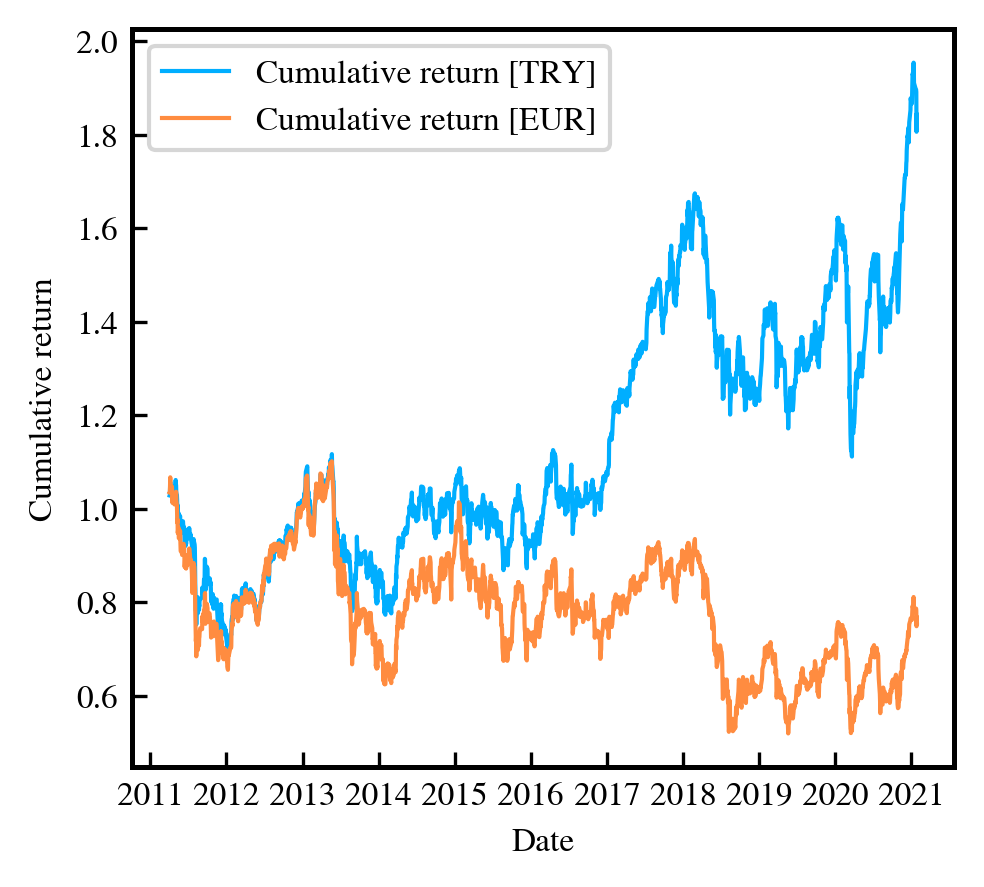

In [10]:
plt.plot(np.exp(np.cumsum(joined['Bist'])),lw=1,label='Cumulative return [TRY]')
plt.plot(np.exp(np.cumsum(joined['Bist']+joined['TRY'])),lw=1,label='Cumulative return [EUR]')
plt.xlabel('Date')
plt.ylabel('Cumulative return')
plt.legend(frameon=1)
plt.tight_layout()
plt.show()

In [34]:
# Stress scenario 1: equity changing by 20%
# Make sets of 5 days
days = np.random.randint(low=0,high=len(joined),size=(2000000,252))

In [35]:
nasdaq = joined['Nasdaq'].values[days]
major_currency = joined['DEXUSEU'].values[days]
minor_currency = joined['TRY'].values[days]
commos         = joined['Commodities'].values[days]
interest_rates = joined['Treasury5y'].values[days]

In [36]:
nasdaq_final = np.exp(np.sum(nasdaq,axis=1))-1
major_currency_final = np.exp(np.sum(major_currency,axis=1))-1
minor_currency_final = np.exp(np.sum(minor_currency,axis=1))-1
commos_final = np.exp(np.sum(commos,axis=1))-1
interest_rates_final = np.sum(interest_rates,axis=1)

In [37]:
#portfolio weights
weights = np.array([0,1,0,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1])
print(joined.columns[np.where(weights)[0]])
weights = weights/np.sum(weights)
weights

Index(['Europe Equity', 'France All Maturities', 'AEX', 'Bist EUR',
       'Commodities EUR', 'US CMBL EUR', 'Nasdaq EUR', 'Emerging equity EUR',
       'Private Debt EUR'],
      dtype='object')


array([0.        , 0.11111111, 0.        , 0.11111111, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.11111111, 0.11111111, 0.11111111, 0.11111111,
       0.11111111, 0.11111111, 0.11111111])

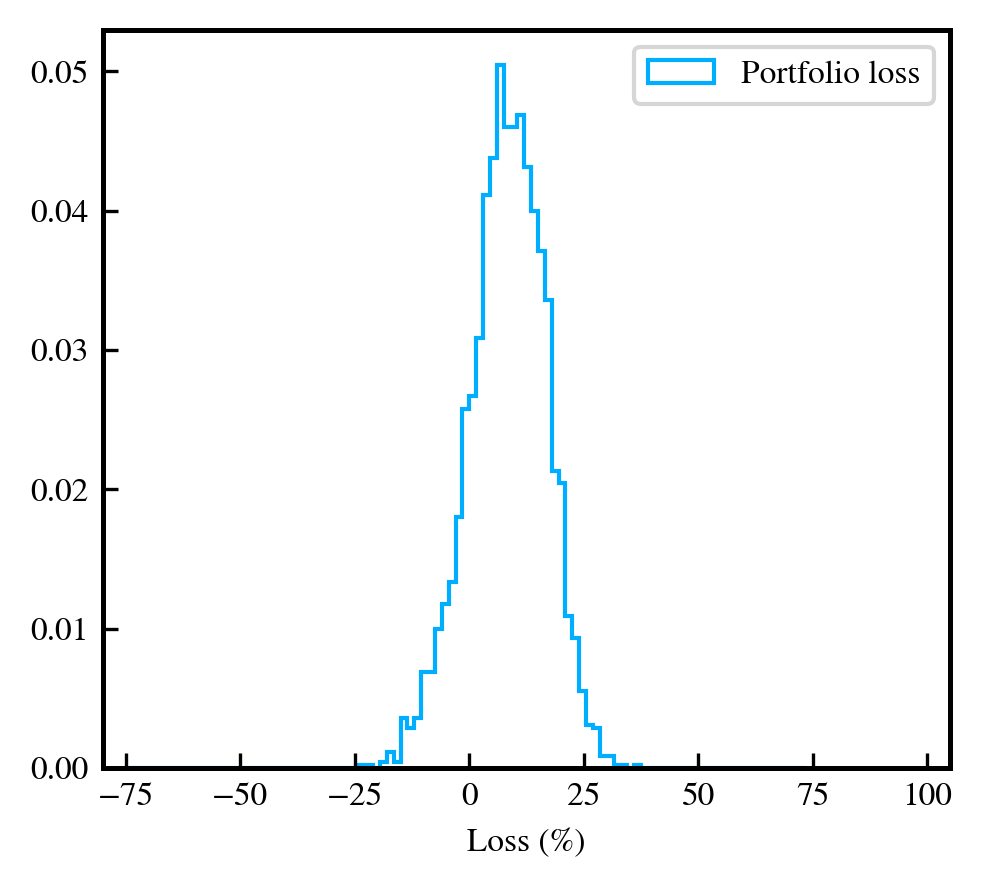

In [39]:
def portfolio_loss(scenarios):
    bins = np.arange(-75,75,1.5)
    portfolios = np.zeros((len(joined.columns),*days[scenarios].shape))
    for i,risk_factor in enumerate(joined.columns):
        returns = joined[risk_factor].values[days][scenarios]
        #paths = np.exp(np.cumsum(joined[risk_factor].values[days][scenarios],axis=1))
        portfolios[i,:,:] = returns
    portfolio = np.dot(weights, portfolios.swapaxes(1,0))
    portfolio = np.exp(np.sum(portfolio,axis=1))
    portfolio_loss = 100-100*portfolio
    plt.hist(portfolio_loss,label='Portfolio loss',histtype='step',bins=bins, density=True,)
    plt.xlim(-80,105)
    plt.xlabel('Loss (%)')
    plt.legend(frameon=1,loc='upper right')
    plt.tight_layout()
    #plt.savefig('Nasdaq_20pct_drop.pdf')
    plt.show()
scenarios = np.argsort(np.abs(nasdaq_final--0.2))[:3000]
portfolio_loss(scenarios)

In [ ]:
def plot_conditionals(scenarios):
    bins = np.arange(-75,75,1.5)

    for stock in ['Commodities', 'Europe Equity', 'US CMBL', 'France All Maturities','Private Debt', 'Emerging equity','Bist']:
        plt.hist(100-100*np.exp(np.sum(joined[stock].values[days][scenarios],axis=1)),histtype='step',bins=bins, density=True,label=stock)
    plt.xlim(-80,105)
    plt.xlabel('Loss (%)')
    plt.legend(frameon=1,loc='upper right')
    plt.tight_layout()
    #plt.savefig('Nasdaq_20pct_drop.pdf')
    plt.show()
    
scenarios = np.argsort(np.abs(nasdaq_final--0.2))[:100]
plot_conditionals(scenarios)

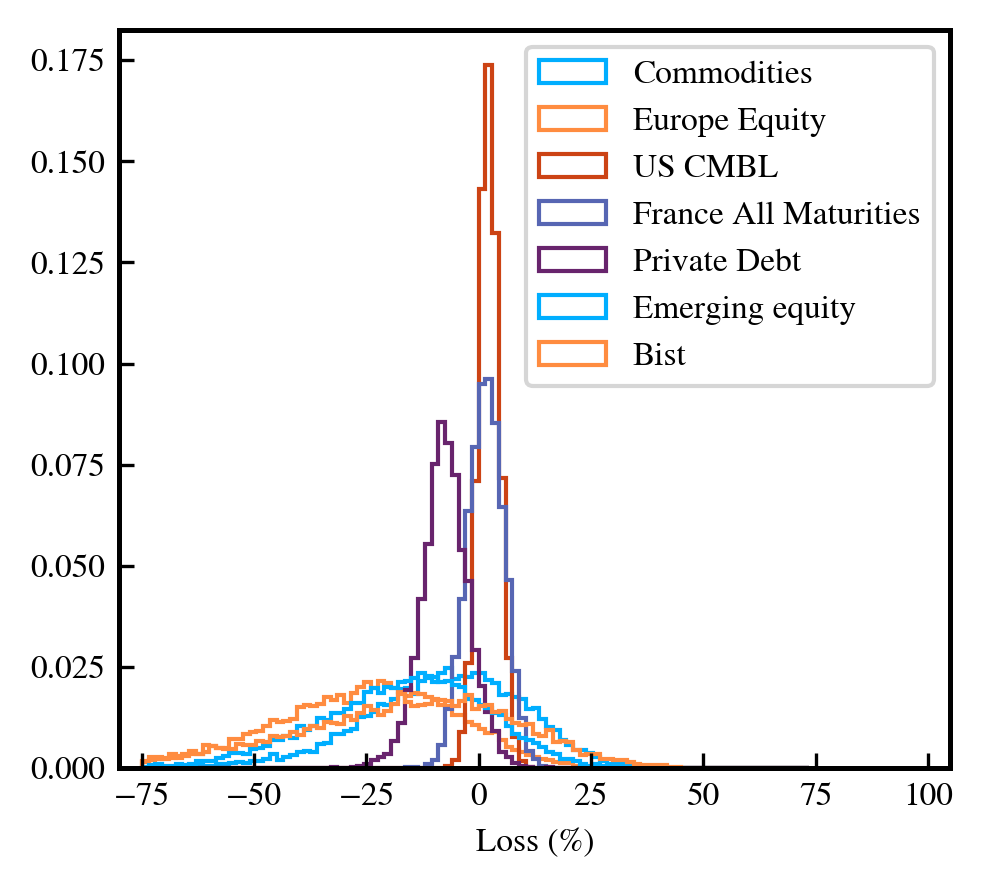

In [257]:
scenarios = np.argsort(np.abs(interest_rates_final-2))[:100]
plot_conditionals(scenarios)